<a href="https://colab.research.google.com/github/xslittlemaggie/Machine-Learning-Projects/blob/master/Breast_Cancer_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Breast Cancer with Logistic Regression<center></h1>

# **Step 0**: Import libraries

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

#**Step 1**: Load data

In [0]:
data = load_breast_cancer()

In [0]:
X = data.data
y = data.target

In [10]:
print("Number of features: {}".format(X.shape[1]))

Number of features: 30


# **Step 2**: Model building

- L1 Regularization

- L2 Regularization

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
lr_l1 = LogisticRegression(penalty = "l1", solver = "liblinear", C = 0.5, max_iter = 1000)
lr_l2 = LogisticRegression(penalty = "l2", solver = "liblinear", C = 0.5, max_iter = 1000)

In [11]:
lr_l1.fit(X, y)
lr_l2.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## 1. L1 vs L2 regularization

In [46]:
non_zero_features = (lr_l1.coef_ != 0).sum()
print("Number of non-zero features: {}".format(non_zero_features))

l1_coef = [*zip(data.feature_names, lr_l1.coef_[0])]
l1_coef = sorted(l1_coef, key = lambda pair : np.abs(pair[1]), reverse = True)
pd.DataFrame(l1_coef, columns = ["features", "coef"])[:5]

Number of non-zero features: 10


,features,coef
0,mean radius,3.984939
1,worst concavity,-2.057682
2,texture error,0.502369
3,worst texture,-0.245207
4,mean perimeter,-0.135007


In [47]:
non_zero_features = (lr_l2.coef_ != 0).sum()
print("Number of non-zero features: {}".format(non_zero_features))

l2_coef = [*zip(data.feature_names, lr_l2.coef_[0])]
l2_coef = sorted(l2_coef, key = lambda pair: np.abs(pair[1]), reverse = True)
pd.DataFrame(l2_coef, columns = ["features", "coef"])[:5]

Number of non-zero features: 30


,features,coef
0,mean radius,1.613311
1,worst radius,1.285297
2,worst concavity,-1.158301
3,worst compactness,-0.877272
4,texture error,0.874999


In [29]:
lr_l2.coef_.shape

(1, 30)

## 2. Model performance evaluation

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [0]:
# train score list
l1_train_scores = []
l2_train_scores = []

# test score list
l1_test_scores = []
l2_test_scores = []

for i in np.linspace(0.05, 1, 19):
  # build the model
  lr_l1 = LogisticRegression(penalty = "l1", solver = "liblinear", C = i, max_iter = 1000)
  lr_l2 = LogisticRegression(penalty = "l2", solver = "liblinear", C = i, max_iter = 1000)

  # fit the model
  lr_l1.fit(x_train, y_train)
  lr_l2.fit(x_train, y_train)

  # get the train score
  l1_train_scores.append(lr_l1.score(x_train,  y_train))
  l2_train_scores.append(lr_l2.score(x_train, y_train)) # = accuracy_score(lr_l2.predict(x_train), y_train)

  # get the test score
  l1_test_scores.append(lr_l1.score(x_test, y_test))
  l2_test_scores.append(lr_l2.score(x_test, y_test))


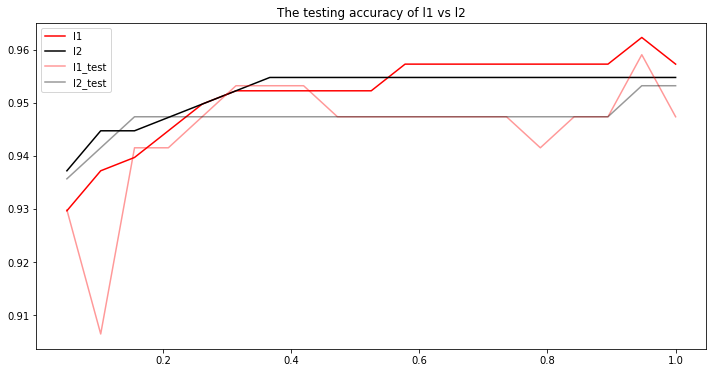

In [78]:
plt.figure(figsize = (12, 6))
plt.plot(np.linspace(0.05, 1, 19), l1_train_scores, label = "l1", c = "red")
plt.plot(np.linspace(0.05, 1, 19), l2_train_scores, label = "l2", c = "black")
plt.title("The training accuracy of l1 vs l2")
plt.legend()
#plt.show()

plt.plot(np.linspace(0.05, 1, 19), l1_test_scores, label = "l1_test", c = "red", alpha = 0.4)
plt.plot(np.linspace(0.05, 1, 19), l2_test_scores, label = "l2_test", c = "black", alpha = 0.4)
plt.title("The testing accuracy of l1 vs l2")
plt.legend()
plt.show()

## 3. Select the model with the best performance

In [86]:
max_l1 = max(l1_test_scores)
max_l2 = max(l2_test_scores)

C_lst = np.linspace(0.05, 1, 19)

if max_l1 >= max_l2:
  print("The best model is L1, with acc: {:.4f}, and C: {:.4f}.".format(max_l1, C_lst[l1_test_scores.index(max_l1)]))
  print(pd.DataFrame(l1_coef, columns = ["features", "coef"]))
else:
  print("The best model is L2, with acc: {:.4f}, and C: {:.4f}.".format(max_l2, C_lst[l2_test_scores.index(max_l2)]))
  print(pd.DataFrame(l2_coef, columns = ["features", "coef"]))


The best model is L1, with acc: 0.9591, and C: 0.8944.
                   features      coef
0               mean radius  3.984939
1           worst concavity -2.057682
2             texture error  0.502369
3             worst texture -0.245207
4            mean perimeter -0.135007
5           worst perimeter -0.128274
6                area error -0.071232
7              mean texture  0.031394
8                 mean area -0.016194
9                worst area -0.014436
10          mean smoothness  0.000000
11         mean compactness  0.000000
12           mean concavity  0.000000
13      mean concave points  0.000000
14            mean symmetry  0.000000
15   mean fractal dimension  0.000000
16             radius error  0.000000
17          perimeter error  0.000000
18         smoothness error  0.000000
19        compactness error  0.000000
20          concavity error  0.000000
21     concave points error  0.000000
22           symmetry error  0.000000
23  fractal dimension error  0.00